In [15]:
from pathlib import Path
%matplotlib widget
from numpy import *
import matplotlib.pyplot as plt

%precision % .2f
import pyproj
import pandas as pd
import numpy as np

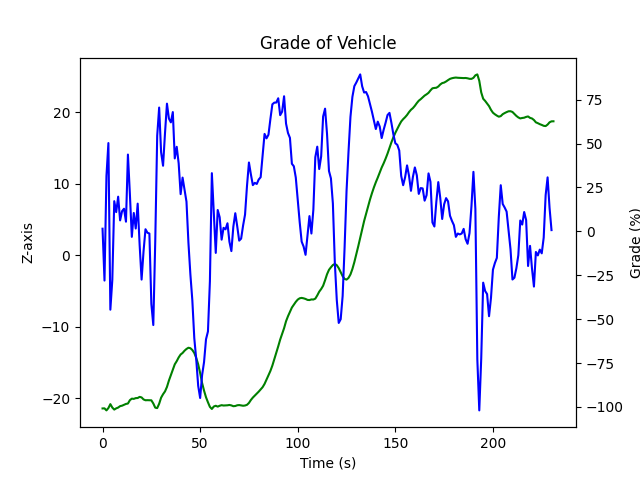

In [16]:

filename = Path('auvedt2.csv')
csv_data = pd.read_csv(filename)
lat, lon, hae, speed = csv_data.latitude, csv_data.longitude, csv_data.altitude, csv_data.speed
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

#lat = 37.4001100556
#lon = -79.1539111111
#hae = 208.38

transformer = pyproj.Transformer.from_crs(
    {"proj": 'latlong', "ellps": 'WGS84', "datum": 'WGS84'},
    {"proj": 'geocent', "ellps": 'WGS84', "datum": 'WGS84'},
)
x, y, z = transformer.transform(lon, lat, hae, radians=False)
x = x - mean(x)
z = z - mean(z)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#ax1.plot(z, 'orange')
ma = moving_average(hae-mean(hae), 2)
ax1.plot(ma, 'green')
ax2.plot(100*arctan(diff(ma)), 'blue')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Z-axis")
ax2.set_ylabel('Grade (%)')
ax1.set_title("Grade of Vehicle")

plt.show()

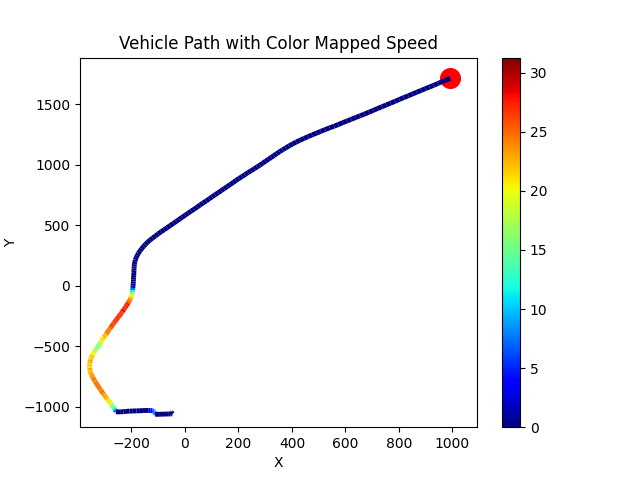

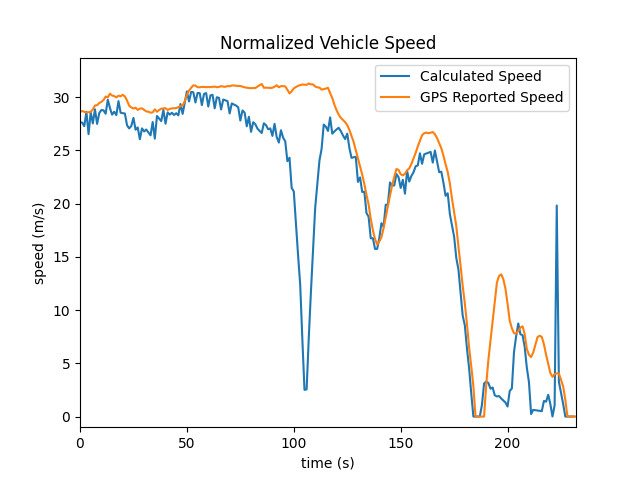

In [23]:

from matplotlib.collections import LineCollection

x = x - mean(x)
y = y - mean(y)
dydx = diff(linalg.norm([x, y, z], axis=0))
#dydx = dydx - mean(dydx)

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(1, 1, sharex=False, sharey=False)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(speed.min(), speed.max())
lc = LineCollection(segments, cmap='jet', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(3.5)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)
axs.set_xlim(x.min()*1.1, x.max()*1.1)
axs.set_ylim(y.min()*1.1, y.max()*1.1)
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.set_title("Vehicle Path with Color Mapped Speed")
axs.scatter(x[0],y[0], s=200, c='r')
plt.show()

fig, axs = plt.subplots(1, 1, sharex=False, sharey=False)
axs.plot(abs(dydx))
axs.plot(speed)
axs.set_xlim(0, len(dydx))
axs.set_ylim(-1, dydx.max()*1.2)
axs.set_xlabel("time (s)")
axs.set_ylabel("speed (m/s)")
axs.set_title("Normalized Vehicle Speed")
axs.legend(["Calculated Speed", "GPS Reported Speed"])
plt.show()